### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [1]:
min_qubits=2
max_qubits=4
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Hydrogen Lattice - Method 1

Hydrogen Lattice Benchmark Program - Qiskit
... execution starting at Jul 28, 2023 21:59:49 UTC
************
Executing [3] circuits for num_qubits = 2
['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_000_75.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_00.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_25.json']
['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_000_75.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_00.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_25.json']
['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instan

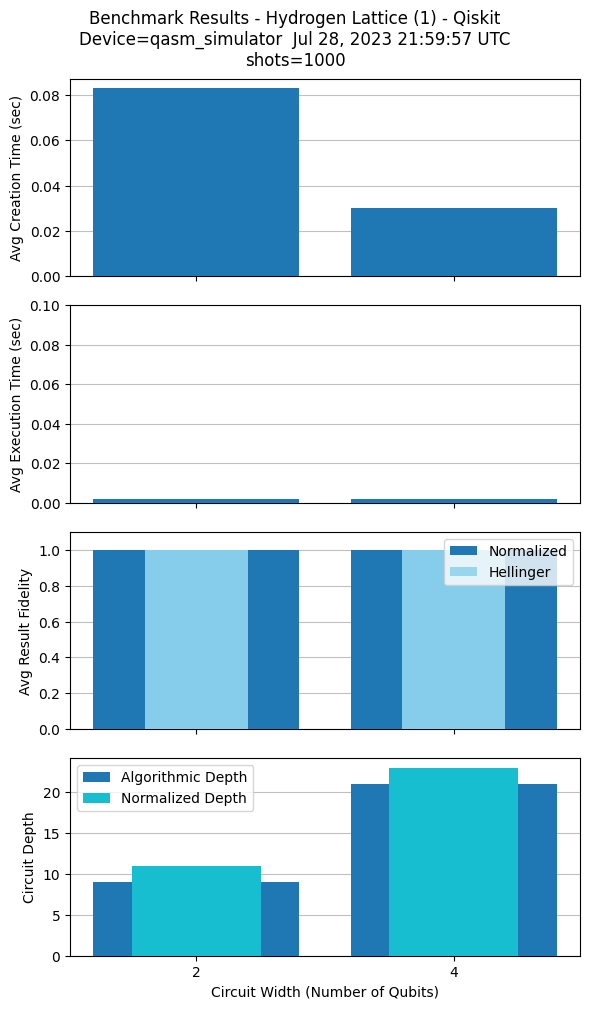

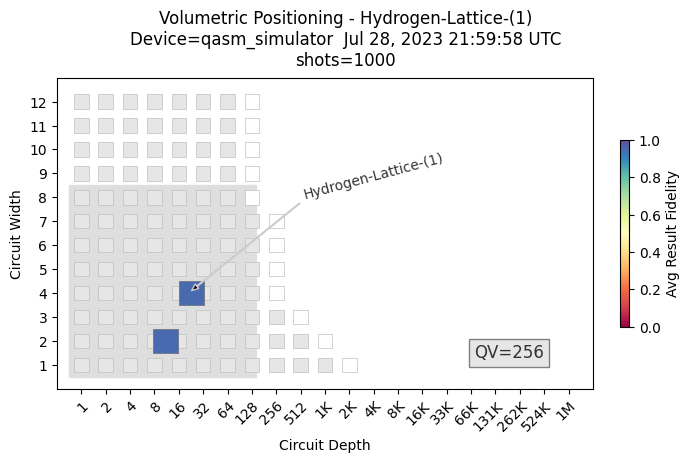

In [5]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hydrogen Lattice - Method 2 - Degree 3 - Approximation Ratio as Objective Function

Hydrogen Lattice Benchmark Program - Qiskit
... execution starting at Jul 28, 2023 21:59:59 UTC
************
Executing [3] restarts for num_qubits = 2
['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_000_75.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_00.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_25.json']

Below Energies are for problem file h002_chain_000_75.json is for 2 qubits and radius 0.75 of paired hamiltionians
PUCCD calculated energy : -1.1319059788720716

Below Classical Energies are in solution file h002_chain_000_75.sol is 2 qubits and radius 0.75 of paired hamiltionians
DOCI calculated energy : -1.1371170673457311
FCI calculated energy : -1.137117067345734


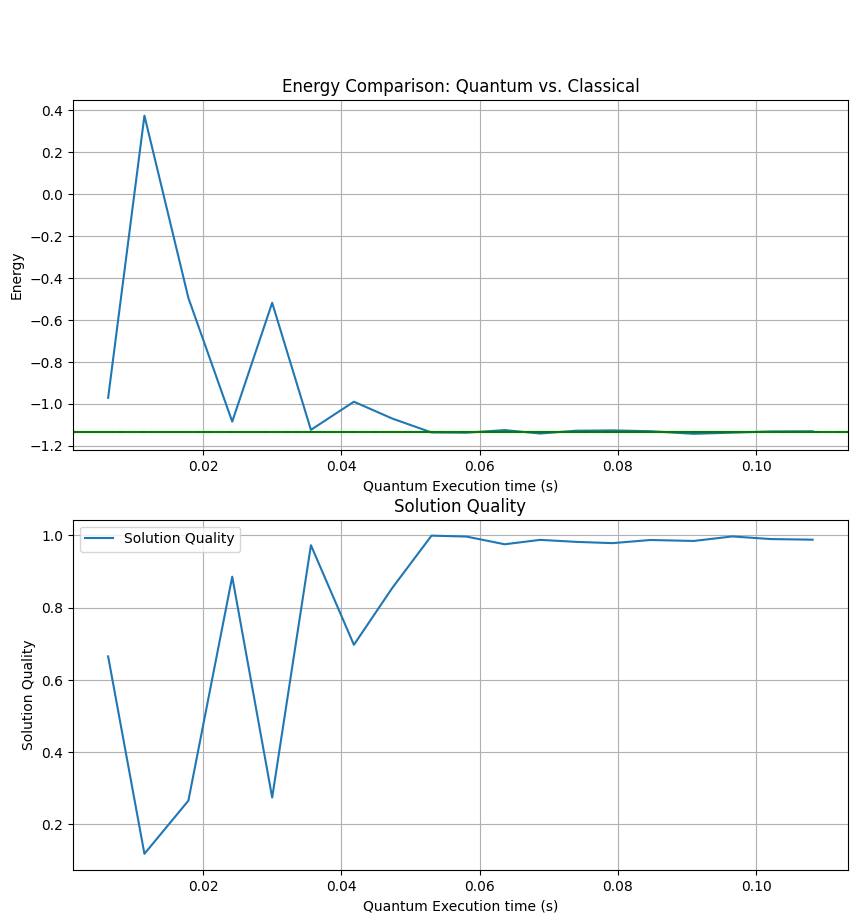

['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_000_75.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_00.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_25.json']

Below Energies are for problem file h002_chain_001_00.json is for 2 qubits and radius 1.0 of paired hamiltionians
PUCCD calculated energy : -1.1021447404815234

Below Classical Energies are in solution file h002_chain_001_00.sol is 2 qubits and radius 1.0 of paired hamiltionians
DOCI calculated energy : -1.101150330232619
FCI calculated energy : -1.1011503302326204


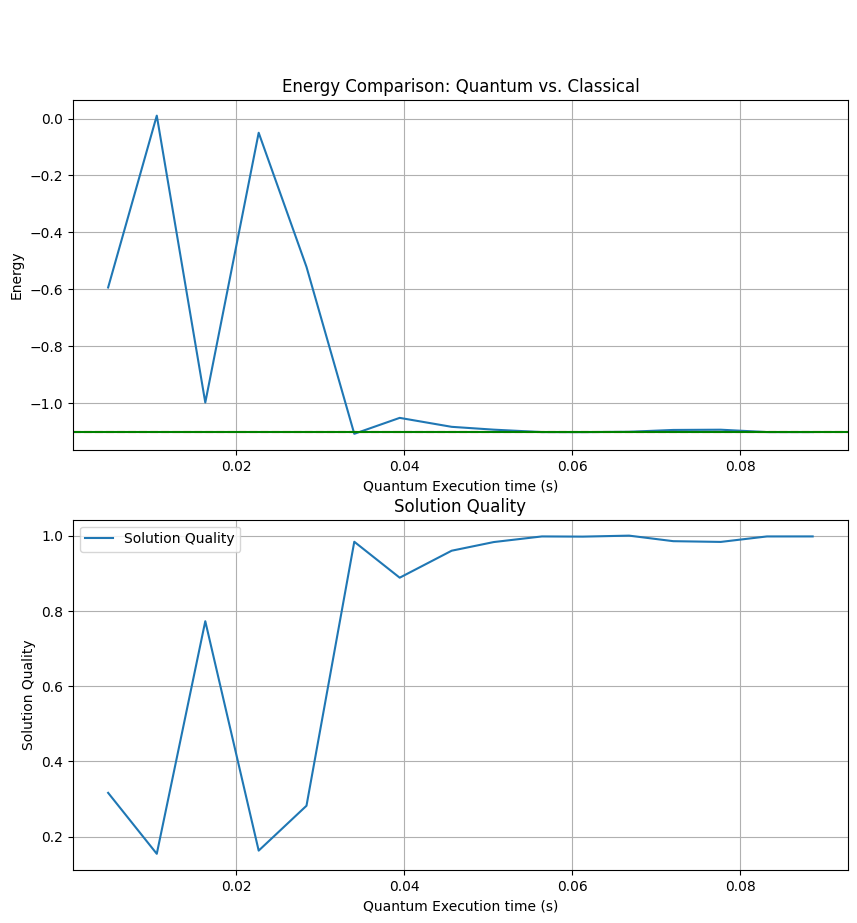

['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_000_75.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_00.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h002_chain_001_25.json']

Below Energies are for problem file h002_chain_001_25.json is for 2 qubits and radius 1.25 of paired hamiltionians
PUCCD calculated energy : -1.0254177318261926

Below Classical Energies are in solution file h002_chain_001_25.sol is 2 qubits and radius 1.25 of paired hamiltionians
DOCI calculated energy : -1.0457831445498011
FCI calculated energy : -1.0457831445498005
Close plots to continue


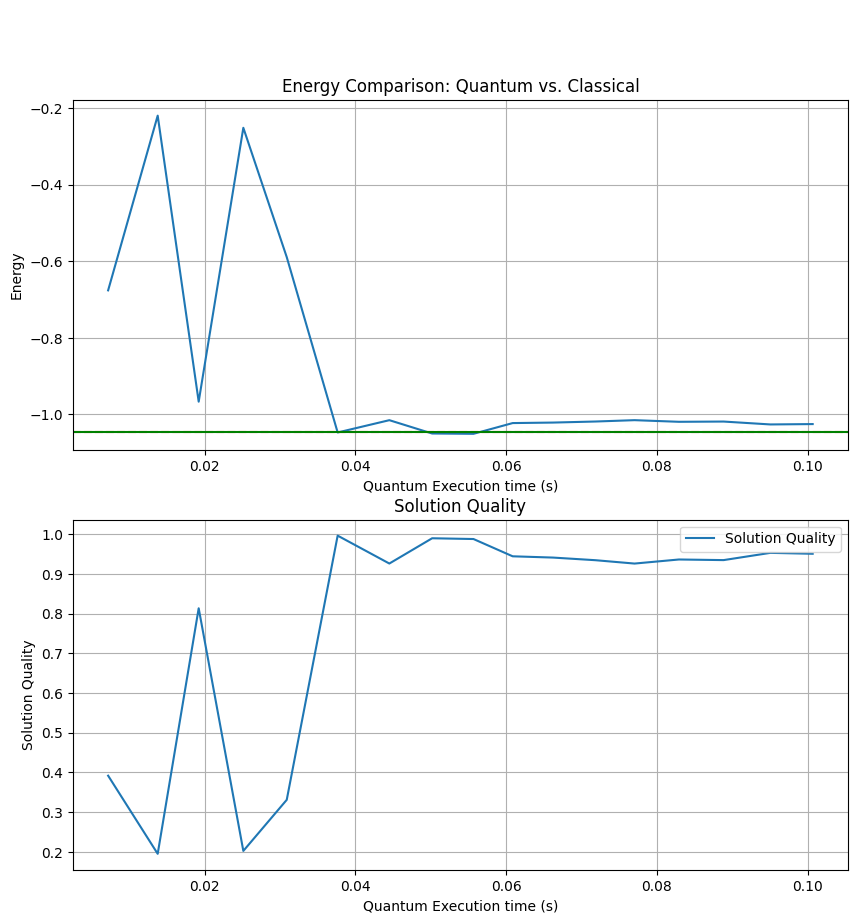

************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 11, 0.118, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.012, 0.071, 0.006 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.0, 0.0

************
Executing [3] restarts for num_qubits = 4
['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_001_25.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_000_75.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_001_00.json']

Below Energies are for problem file h004_chain_001_25.json is for 4 qubits and radius 1.25 of paired hamiltionians
PUCCD calculated energ

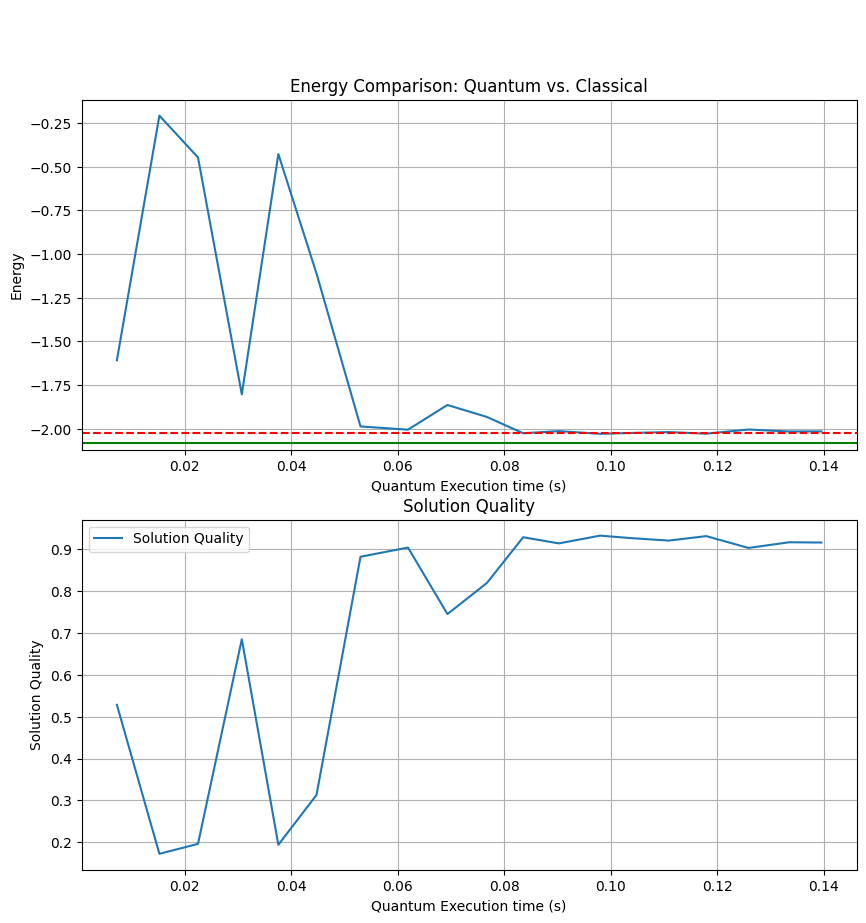

['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_001_25.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_000_75.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_001_00.json']

Below Energies are for problem file h004_chain_000_75.json is for 4 qubits and radius 0.75 of paired hamiltionians
PUCCD calculated energy : -2.121872815479551

Below Classical Energies are in solution file h004_chain_000_75.sol is 4 qubits and radius 0.75 of paired hamiltionians
DOCI calculated energy : -2.1288045079865534
FCI calculated energy : -2.145110647186196


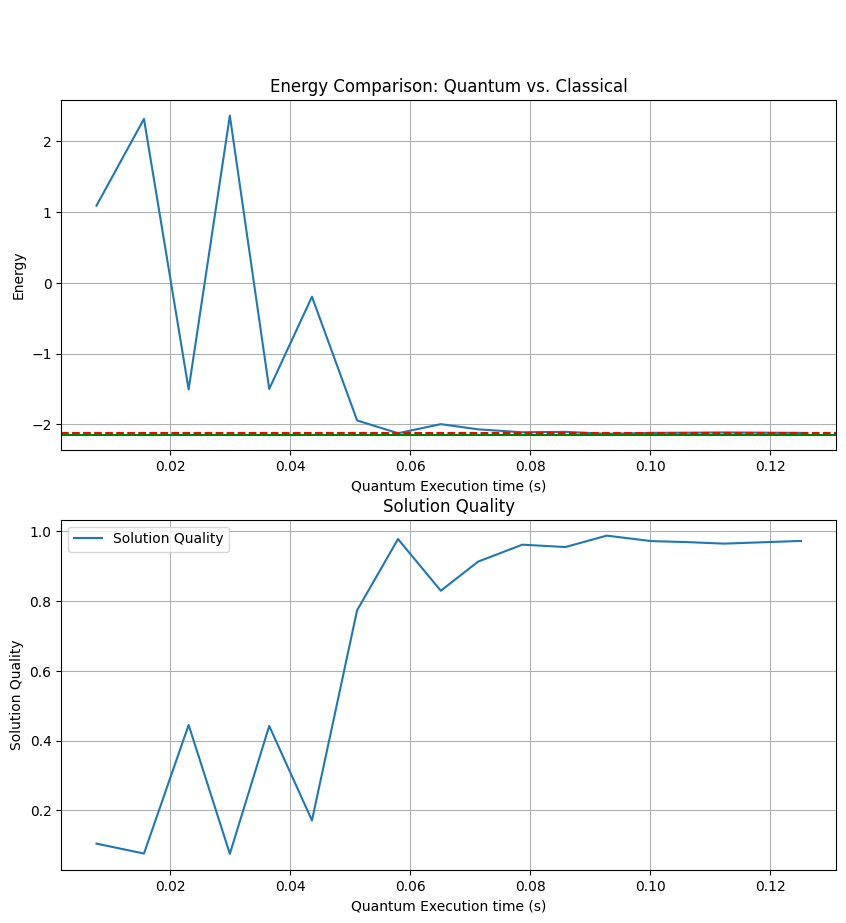

['/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_001_25.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_000_75.json', '/home/amanmehta/workspace/qedc/fork/qedc_benchmarking/hydrogen-lattice/qiskit/../_common/instances/h004_chain_001_00.json']

Below Energies are for problem file h004_chain_001_00.json is for 4 qubits and radius 1.0 of paired hamiltionians
PUCCD calculated energy : -2.131041622255953

Below Classical Energies are in solution file h004_chain_001_00.sol is 4 qubits and radius 1.0 of paired hamiltionians
DOCI calculated energy : -2.1339866470704916
FCI calculated energy : -2.1663874486347554
Close plots to continue


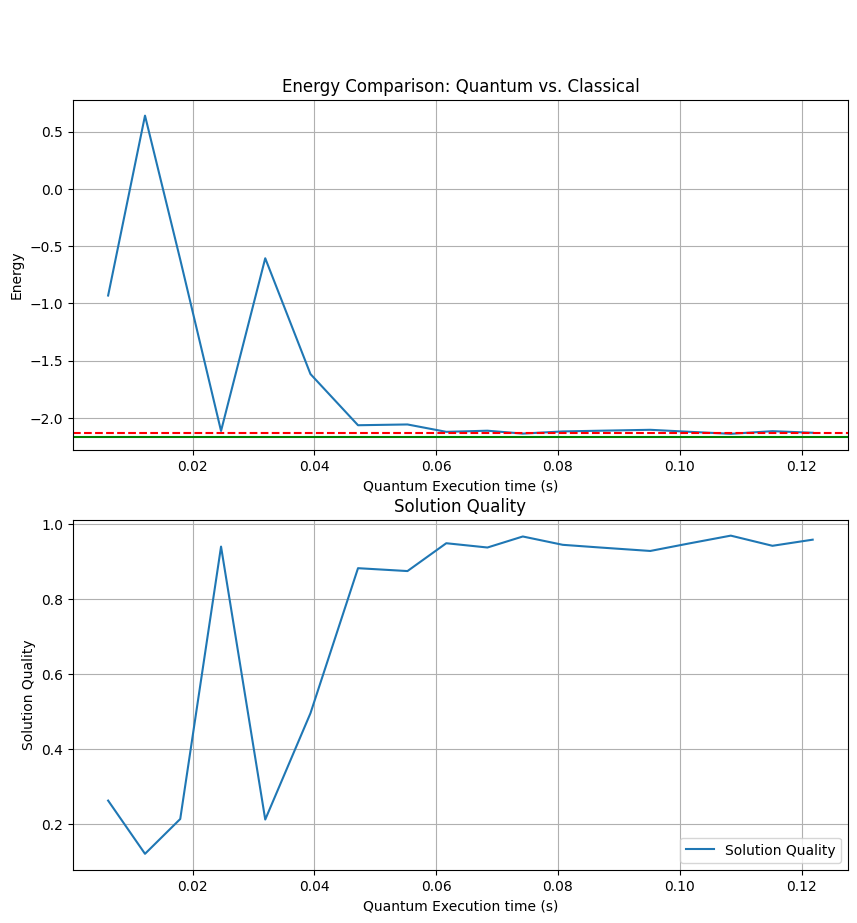

************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 20, 0.19
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 23, 0.148, 8.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.022, 0.09, 0.006 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.0, 0.0

... execution complete at Jul 28, 2023 22:00:13 UTC in 13.949 secs



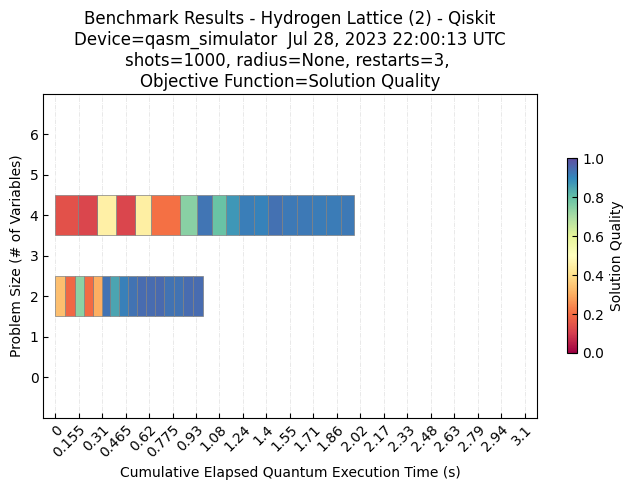

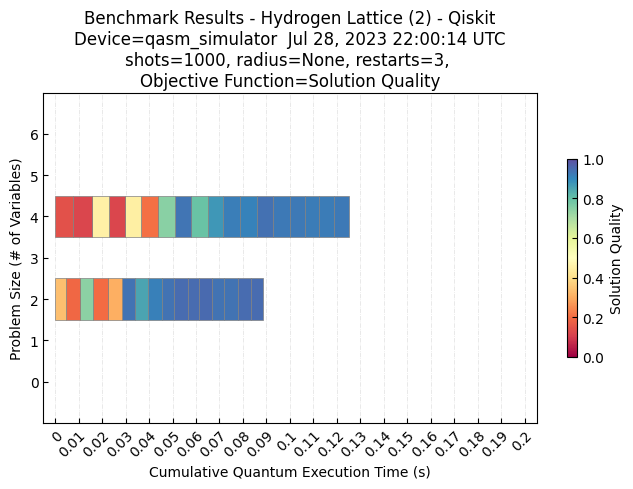

In [6]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

# execute and display options
objective_func_type = 'solution_quality'
score_metric=['solution_quality', 'accuracy_volume']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, radius=None, do_fidelities=False, parameterized=False,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

In [7]:
import os, hydrogen_lattice_benchmark
backend_id = "qasm_simulator"
hydrogen_lattice_benchmark.load_data_and_plot(os.path.join('__results', backend_id, 'approx_ratio'),
                score_metric=['approx_ratio', 'cvar_ratio'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time'])

AttributeError: module 'hydrogen_lattice_benchmark' has no attribute 'load_data_and_plot'